<a href="https://colab.research.google.com/github/mvdantas/Data-Science/blob/master/investing_fundos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install investpy

     |████████████████████████████████| 4.4 MB 5.4 MB/s 
     |████████████████████████████████| 235 kB 58.4 MB/s 
     |████████████████████████████████| 6.3 MB 27.5 MB/s 
     |████████████████████████████████| 510 kB 74.7 MB/s 
  Created wheel for investpy: filename=investpy-1.0.7-py3-none-any.whl size=4495221 sha256=ac0009a34ec1fcc86c9d35aae4c68851b80bca61f0a83038e89e4ffb7febfc2a
  Stored in directory: /root/.cache/pip/wheels/50/bb/ee/760eeb6cc7ed8efc1b1b23b13b6b9f17fb1ed530fb04bd16f5
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import investpy as inv

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize']= (16,8)


In [ ]:
fundos_br = inv.get_funds_list(country = 'brazil')
fundos_br

['Fundo De Investimento Multimercado Bordeaux Iv Crédito Privado Investimento No Exterior',
 'Cshg Warrior V Fundo De Investimento Multimercado - Crédito Privado Investimento No Exterior',
 'A3 Viking Fi Em Quotas De Fi Multimercado Crédito Privado Investimento No Exterior',
 'Bb Espelho Multimercado Lp J. Safra Absoluto 30 Private Fic Fi',
 'Ctm Hedge Fundo De Investimento Multimercado - Longo Prazo',
 'Vif - Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado',
 'Fundo De Investimento Multimercado Bordeaux Iii Crédito Privado Investimento No Exterior',
 'Bb Top Tatico Fundo De Investimento Multimercado',
 'Epm Fundo De Investimento Multimercado Crédito Privado Investimento No Exterior',
 'Western Asset Multitrading H Multimercado Fundo De Investimento',
 'Concordia Phoenix Fundo De Investimento Multimercado Crédito Privado',
 'Fundo De Investimento Multimercado Irmb Crédito Privado - Investimento No Exterior',
 'Wm Multigestor Estratégia Fundo De Investimento Em Cot

In [ ]:
len(fundos_br)

5200

In [ ]:
pesq = inv.search_funds(by='name', value ='alaska black')

In [ ]:
pesq

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,brazil,Alaska Black Fundo De Investimento Em Cotas De...,0P0000U9BK,Alaska Investimentos LTDA.,BRSKP7CTF008,other,BRL,
1,brazil,Alaska Black Master Fundo De Investimento Em A...,0P0000U9BJ,Alaska Investimentos LTDA.,BRSKI1CTF000,other,BRL,
2,brazil,Alaska Black Fundo De Investimento Em Cotas De...,0P00019LLR,Alaska Investimentos LTDA.,BRALK5CTF006,equity,BRL,
3,brazil,Alaska Black Institucional Fundo De Investimen...,0P00019X6E,Alaska Investimentos LTDA.,BRASK4CTF002,equity,BRL,
4,brazil,Alfa Alaska Black Institucional - Fundo De Inv...,0P0001CF6A,Banco Alfa Investimentos SA,BRLSK1CTF005,equity,BRL,


In [ ]:
pesq['name'][0]

'Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I'

In [ ]:
fundo = 'Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I'

In [ ]:
alaska = inv.get_fund_historical_data(fundo, country = 'brazil', from_date = '01/01/1900', to_date = '16/09/2021')['Close']
alaska

Date
2011-01-25    0.999
2011-01-26    0.991
2011-01-27    0.977
2011-01-28    0.956
2011-01-31    0.953
              ...  
2021-09-10    2.436
2021-09-13    2.524
2021-09-14    2.514
2021-09-15    2.461
2021-09-16    2.439
Name: Close, Length: 2656, dtype: float64

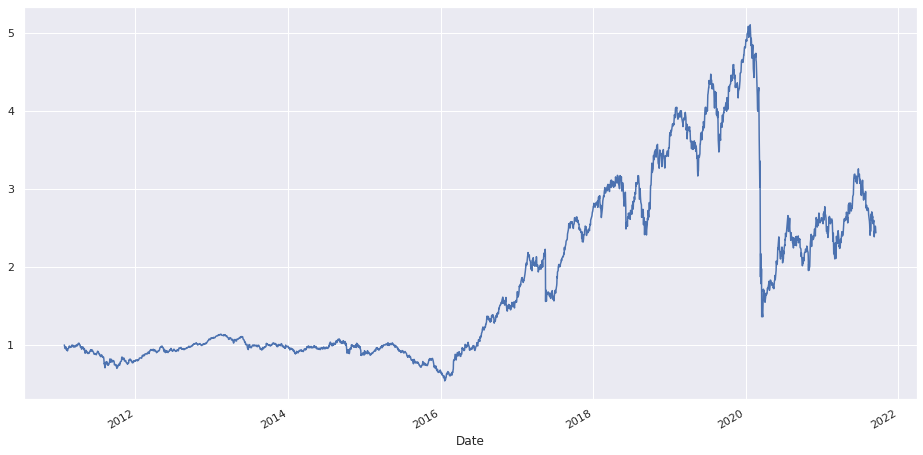

In [ ]:
alaska.plot()

In [ ]:
pesq2 = inv.search_funds(by='name', value ='verde')
pesq2

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,brazil,Cshg Allocation Verde Am Agar Fundo De Investi...,0P0000UAA2,Credit Suisse Hedging-Griffo Wealth Management...,BRHGA1CTF007,other,BRL,
1,brazil,Vértice Verde 14 Multimercado Fundo De Investi...,0P00018JDB,Itaú DTVM SA,BRVVM1CTF006,other,BRL,
2,brazil,Verde Am Agar Fundo De Investimento Em Cotas D...,0P00015SYP,Verde Asset Management SA,BRVDG1CTF006,other,BRL,
3,brazil,Fator Portfolio Verde - Fundo De Investimento ...,0P0000U2RB,FAR Fator Admistração de Recursos Ltda,BRHGV2CTF000,other,BRL,
4,brazil,Cshg Allocation Verde Am Ii Fundo De Investime...,0P0000UETY,Credit Suisse Hedging-Griffo Wealth Management...,,other,BRL,
...,...,...,...,...,...,...,...,...
74,denmark,Nordea Invest Verdens Obligationsmarkeder,0P0000UV88,Nordea Invest,DK0060353886,bond,DKK,
75,norway,Klp Aksjeverden Indeks,0P0000TJ54,KLP Kapitalforvaltning AS,NO0010611817,equity,NOK,
76,norway,Nordea Aksjer Verden,0P00009UMS,"Nordea Funds Oy, Norwegian Branch",NO0010392640,equity,NOK,
77,spain,Rga Serie Verde Pp,0P00013TXJ,RGA Rural Pensiones EGFP,,equity,EUR,


In [ ]:
pesq2['name'][2]

'Verde Am Agar Fundo De Investimento Em Cotas De Fundo De Investimento Multimercado'

In [ ]:
fundo = 'Verde Am Agar Fundo De Investimento Em Cotas De Fundo De Investimento Multimercado'
verde = inv.get_fund_historical_data(fundo, country = 'brazil', from_date = '01/01/1900', to_date = '16/09/2021')['Close']
verde

Date
2018-11-22    12.760
2018-11-23    12.737
2018-11-26    12.686
2018-11-27    12.740
2018-11-28    12.800
               ...  
2021-09-10    15.097
2021-09-13    15.164
2021-09-14    15.171
2021-09-15    15.192
2021-09-16    15.205
Name: Close, Length: 691, dtype: float64

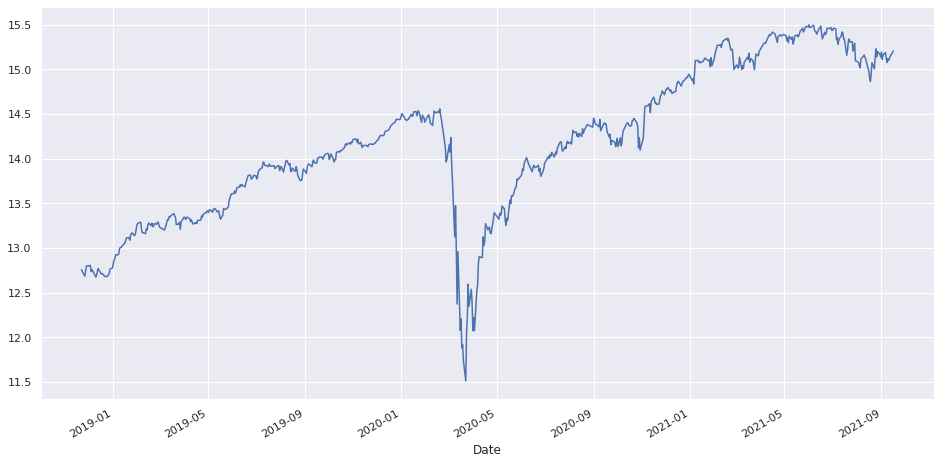

In [ ]:
verde.plot()

In [ ]:
inv.get_etfs_overview(country='brazil')

,country,name,full_name,symbol,last,change,turnover,currency
0,brazil,Ishares Ibovespa,Ishares Ibovespa,BOVA11,107.14,-2.10%,9210000,BRL
1,brazil,It Now Ibovespa Fundo De Indice,It Now Ibovespa Fundo De Indice,BOVV11,112.00,-2.10%,3660000,BRL
2,brazil,Trend Ibovespa,Trend ETF Ibovespa Fundo de Índice,BOVX11,11.11,-2.11%,1340000,BRL
3,brazil,Trend ETF MSCI China Fundo de Investimento indice,Trend ETF MSCI China Fundo de Investimento Índ...,XINA11,8.87,+1.26%,896490,BRL
4,brazil,BB ETF Ibovespa Fundo de Indice,BB ETF Ibovespa Fundo de Índice,BBOV11,57.27,-1.77%,529720,BRL
...,...,...,...,...,...,...,...,...
80,brazil,CAIXA Ibovespa,CAIXA Ibovespa,XBOV11,109.14,-1.94%,40,BRL
81,brazil,iShares Europe BDR,iShares Europe ETF BDR,BIEV39,57.36,0.00%,0,BRL
82,brazil,iShares MSCI USA Momentum Factor BDR,iShares MSCI USA Momentum Factor ETF BDR,BMTU39,47.00,0.00%,0,BRL
83,brazil,iShares MSCI Emerging Markets Min Vol Factor BDR,iShares MSCI Emerging Markets Min Vol Factor E...,BEMV39,56.25,0.00%,0,BRL


In [ ]:
bova11 = inv.get_etf_historical_data('Ishares Ibovespa', country='brazil', from_date = '01/01/1900', to_date = '16/09/2021')['Close']

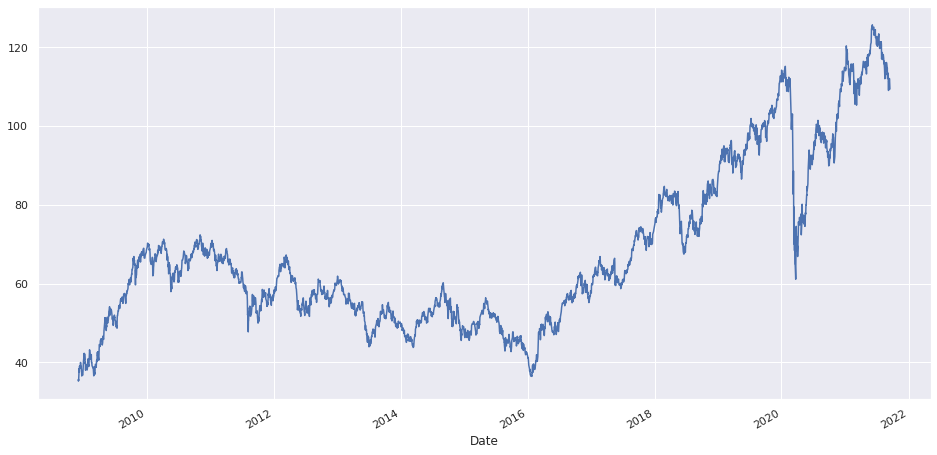

In [ ]:
bova11.plot()

In [ ]:
comparativo = pd.DataFrame()
data_inicio = verde.index[0]
comparativo['verde'] = verde / verde.loc[data_inicio]
comparativo['alaska'] = alaska / alaska.loc[data_inicio]
comparativo['bova11'] = bova11 / bova11.loc[data_inicio]

comparativo

,verde,alaska,bova11
Date,,,
2018-11-22,1.000000,1.000000,1.000000
2018-11-23,0.998197,0.989873,0.984935
2018-11-26,0.994201,0.951389,0.976750
2018-11-27,0.998433,0.973669,1.002254
2018-11-28,1.003135,0.999421,1.020166
...,...,...,...
2021-09-10,1.183150,0.704861,1.303440
2021-09-13,1.188401,0.730324,1.330012
2021-09-14,1.188950,0.727431,1.325030


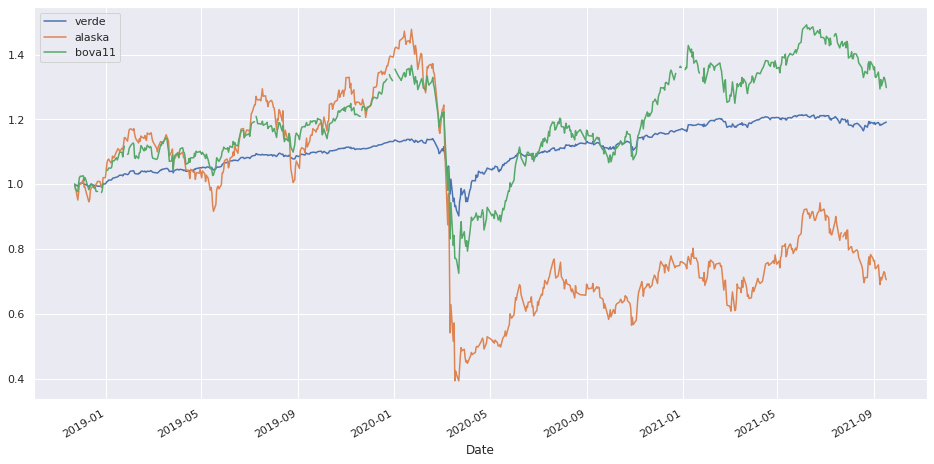

In [ ]:
comparativo.plot()